<a href="https://colab.research.google.com/github/katrinasbor15/Final-learning-project/blob/main/vkr_project_open_credit_card_4_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  1. Общее описание

**Аналитическая задача** — провести анализ данных с целью выделения портрета клиентов, которые будут открывать карту, и портрета клиентов, которые не будут открывать карту.

## Описание данных
Каждый клиент описывается следующим набором признаков:

|Признак|Комментарий|
|--:|:--|
|`client_id`|Идентификационный номер|
|`gender`|Пол|
|`age`|Возраст|
|`marital_status`|Семейный статус|
|`job_position`|Работа|
|`credit_sum`|Сумма кредита|
|`credit_month`|Срок кредитования|
|`score_shk`|Внутренняя скоринговая оценка|
|`education`|Образование|
|`tariff_id`|Идентификационный номер тарифа|
|`living_region`|Регион|
|`monthly_income`|Месячный заработок|
|`credit_count`|Количество кредитов у клиента|
|`overdue_credit_count`|Количество просроченных кредитов у клиента|
|`open_account_flg`|Факт открытия кредитного счета в данном банке|
|`avregzarplata`|Средняя заработная плата в регионе|
|`okrug`|Федеральный округ|
|date_bank|Дата обращения в банк|

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Провести исследовательский анализ данных:
- исследовать распределения признаков;
- исследовать возможные зависимости между признаками;

**Шаг 4.** Отбор признаков и портреты клиентов:
- исследовать признаки в разрезе групп;
- выявить наличие значимых различий в значениям признаков в разрезе групп;
- сформулировать и проверить гипотезы о равенстве значений показателей по группам

**Шаг 5.** Построить классификационные модели
- Построить несколько моделей классификации и сравнить их.    
- исследовать возможные зависимости между признаками;

**Шаг 4.** Отбор признаков и портреты клиентов:
- исследовать признаки в разрезе групп;
- выявить наличие значимых различий в значениям признаков в разрезе групп;
- сформулировать и проверить гипотезы о равенстве значений показателей по группам.

Дополнительное задание (выполнение по желанию):  построить классификационные модели для прогнозирования значений целевой переменной.

# Шаг 1. Загрузка данных;

In [1]:
# подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

## Блок пользовательских функций

In [2]:
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

In [3]:
# загрузка данных
df = pd.read_csv('/content/vkr_dataset_open_credit_card.csv')

In [4]:
# вывод первых записей
df.head(5)
df.tail(5)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg,date_bank
51870,51871,1,32.0,3.0,15,30022,10,"0,492997",5.0,18.0,31.0,7.0,42460.0,160000.0,2.0,0.0,0.0,2021-11-29 12:08:43
51871,51872,2,32.0,3.0,15,47748,12,"0,359582",2.0,2.0,19.0,4.0,18040.0,83000.0,1.0,0.0,1.0,2015-05-09 15:23:45
51872,51873,1,25.0,4.0,14,12319,10,"0,694354",2.0,28.0,7.0,7.0,22770.0,25000.0,NaN,NaN,0.0,2021-01-15 15:40:48
51873,51874,1,46.0,3.0,14,5333,6,"0,522815",4.0,2.0,32.0,3.0,43670.0,20000.0,3.0,0.0,0.0,2017-12-15 18:50:40
51874,51875,2,36.0,3.0,14,21128,10,"0,297297",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# просмотр информации о типах данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51875 entries, 0 to 51874
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             51875 non-null  int64  
 1   gender                51875 non-null  int64  
 2   age                   51873 non-null  float64
 3   marital_status        51870 non-null  float64
 4   job_position          51875 non-null  int64  
 5   credit_sum            51874 non-null  object 
 6   credit_month          51875 non-null  int64  
 7   score_shk             51872 non-null  object 
 8   education             51871 non-null  float64
 9   tariff_id             51874 non-null  float64
 10  living_region         51809 non-null  float64
 11  okrug                 51809 non-null  float64
 12  avregzarplata         51809 non-null  float64
 13  monthly_income        51872 non-null  float64
 14  credit_count          49083 non-null  float64
 15  overdue_credit_coun

In [6]:
# просмотр информации об описательных статистиках
perc = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
df.describe(percentiles = perc)

,client_id,gender,age,marital_status,job_position,credit_month,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,51875.000000,51875.000000,51873.000000,51870.000000,51875.000000,51875.000000,51871.000000,51874.000000,51809.000000,51809.000000,51809.000000,51872.000000,49083.000000,49083.000000,51874.000000
mean,25938.000000,1.478651,36.516627,3.195836,13.160096,10.978660,3.200922,14.111559,42.914262,4.823892,33010.324847,40247.679461,2.103763,0.046941,0.175309
std,14975.166944,0.499549,10.562324,0.742747,3.139633,3.541538,1.063730,11.548023,22.176554,2.261360,12640.627689,26254.725057,1.765837,0.213528,0.380235
min,1.000000,1.000000,18.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,16830.000000,5600.000000,0.000000,0.000000,0.000000
1%,519.740000,1.000000,21.000000,1.000000,1.000000,4.000000,2.000000,1.000000,3.000000,1.000000,17490.000000,11500.000000,0.000000,0.000000,0.000000
5%,2594.700000,1.000000,23.000000,2.000000,3.000000,6.000000,2.000000,2.000000,7.000000,2.000000,20130.000000,15000.000000,0.000000,0.000000,0.000000
25%,12969.500000,1.000000,28.000000,3.000000,14.000000,10.000000,2.000000,2.000000,25.000000,2.000000,25520.000000,25000.000000,1.000000,0.000000,0.000000
50%,25938.000000,1.000000,34.000000,3.000000,14.000000,10.000000,4.000000,19.000000,40.000000,5.000000,27390.000000,35000.000000,2.000000,0.000000,0.000000
75%,38906.500000,2.000000,43.000000,4.000000,14.000000,12.000000,4.000000,28.000000,63.000000,7.000000,42460.000000,50000.000000,3.000000,0.000000,0.000000
95%,49281.300000,2.000000,57.000000,4.000000,15.000000,18.000000,5.000000,28.000000,76.000000,8.000000,66880.000000,80000.000000,5.000000,0.000000,1.000000


In [7]:
df.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id',
       'living_region', 'okrug', 'avregzarplata', 'monthly_income',
       'credit_count', 'overdue_credit_count', 'open_account_flg',
       'date_bank'],
      dtype='object')

In [8]:
for col in df.select_dtypes('object').columns:
    print(f'Уникальные значения признака <<<{col}>>>')
    print(df[col].unique())
    print('-'*10)

Уникальные значения признака <<<credit_sum>>>
['59998' '10889' '10728' ... '30022' '47748' '5333']
----------
Уникальные значения признака <<<score_shk>>>
['0,770249' '0,248514' '0,459589' ... '0,651947' '0,58811' '0,196092']
----------
Уникальные значения признака <<<date_bank>>>
['2016-02-16 18:54:34' '2016-02-15 12:39:04' '2015-01-27 18:57:19' ...
 '2021-01-15 15:40:48' '2017-12-15 18:50:40' nan]
----------


Выводы по знакомству

Данные загружены корректно;
обнаружены следующие особенности данных:

|Признак|Комментарий|
|--:|:--|
|||
||нет текстовых признаков|
||имеются пропущеннные данные|
|`date_bank`|дата, скорректировать тип данных|
|`credit_sum`  |тип object -> поменять тип данных|
|`date_bank`|поменять тип данных->дата|
|`monthly_income`|возможно есть аномалии|
|`credit_count`|возможно есть аномалии|

# Шаг 2. Первичная обработка данных

## Предобработка данных: корректировка типов

In [9]:
#  скорректировать тип признака 'date_bank'
df['date_bank'] = pd.to_datetime(df['date_bank'], errors='coerce')

In [10]:
# предобработка: преобразуем тип данных 'credit_sum'
df['credit_sum'] = pd.to_numeric(df['credit_sum'], errors='coerce')
print(df['credit_sum'].dtype)  # float64

float64


In [11]:
# предобработка: преобразуем тип данных 'score_shk'
df['score_shk'] = df['score_shk'].str.replace(',', '.').astype(float)

## Предобработка данных: поиск дублей

In [12]:
# проверить наличие дублирующихся записей;
df.duplicated().sum()
# дублирующихся строк нет

np.int64(0)

## Предобработка: поиск и обработка аномальных значений

In [13]:
# выделим список непрерывных признаков
lst_var_cont = ['age','credit_sum','credit_month','score_shk',
                'avregzarplata','monthly_income',
                'credit_count', 'overdue_credit_count']

In [14]:
df.credit_month.nunique()

28

In [24]:
# import os
# os.makedirs("img", exist_ok=True)

In [29]:
# графики циклически для 'age','credit_sum','credit_month','score_shk'
plt.subplots(4,2, figsize=(10,18),  gridspec_kw={'wspace': 0.7,
                                                 'hspace': 0.3})
for index, col in enumerate(lst_var_cont[:4]):
# ящик с усами
    plt.subplot(4,2, 2*index+1)
    ax_1 = sns.boxplot(df[col]);
    plt.title(f'Ящик с усами для признака \n <<{col}>>')


# 1 гистограмма
    plt.subplot(4,2, 2*index+2)
    ax_2 = sns.histplot(df[col],
                        kde=True);
    plt.title(f'Гистограмма для признака \n <<{col}>>')
    per_1 = np.nanpercentile(df[col],1)
    per_99 = np.nanpercentile(df[col],99)

    # расчет и визуализация перцентилей

    ax_2.axvline(per_1,
                color='red',
                linestyle='--',
                label=f'{np.round(per_1,1)} значение 1-го перцентиля')
    ax_2.axvline(per_99,
                color='green',
                linestyle='--',
                label=f'{np.round(per_99,1)} значение 99-го перцентиля')

# расчет и визуализация усов

    low_wish, hi_wish = calc_boxplot(df[col])
    ax_2.axvline(low_wish,
                    color='yellow',
                    linestyle='--',
                    label=f'{np.round(low_wish,1)} значение нижнего уса')
    ax_2.axvline(hi_wish,
                    color='blue',
                    linestyle='--',
                    label=f'{np.round(hi_wish,1)} значение верхнего уса')
    plt.legend()

    plt.savefig(f"img/hist_{col}.png", dpi=150, bbox_inches="tight")
    plt.close()

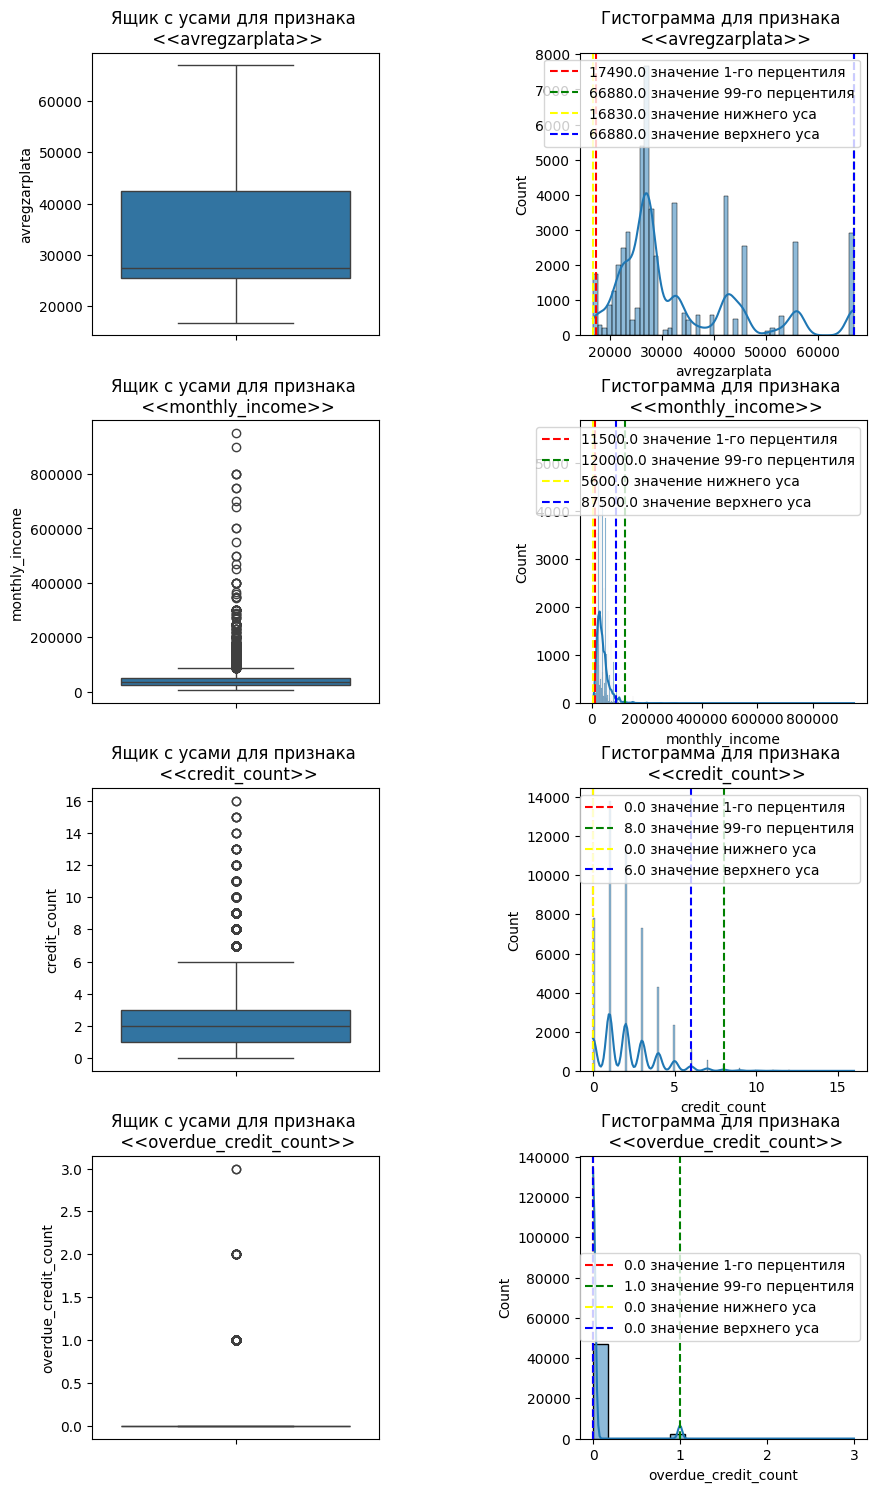

In [16]:
# графики циклически для 'avregzarplata','monthly_income', 'credit_count', 'overdue_credit_count'
plt.subplots(4,2, figsize=(10,18),  gridspec_kw={'wspace': 0.7,
                                                 'hspace': 0.3})
for index, col in enumerate(lst_var_cont[4:]):
# ящик с усами
    plt.subplot(4,2, 2*index+1)
    ax_1 = sns.boxplot(df[col]);
    plt.title(f'Ящик с усами для признака \n <<{col}>>')


# 1 гистограмма
    plt.subplot(4,2, 2*index+2)
    ax_2 = sns.histplot(df[col],
                        kde=True);
    plt.title(f'Гистограмма для признака \n <<{col}>>')
    per_1 = np.nanpercentile(df[col],1)
    per_99 = np.nanpercentile(df[col],99)
    # расчет и визуализация перцентилей

    ax_2.axvline(per_1,
                color='red',
                linestyle='--',
                label=f'{np.round(per_1,1)} значение 1-го перцентиля')
    ax_2.axvline(per_99,
                color='green',
                linestyle='--',
                label=f'{np.round(per_99,1)} значение 99-го перцентиля')

# расчет и визуализация усов

    low_wish, hi_wish = calc_boxplot(df[col])
    ax_2.axvline(low_wish,
                    color='yellow',
                    linestyle='--',
                    label=f'{np.round(low_wish,1)} значение нижнего уса')
    ax_2.axvline(hi_wish,
                    color='blue',
                    linestyle='--',
                    label=f'{np.round(hi_wish,1)} значение верхнего уса')
    plt.legend()

In [17]:

def outlier_summary(df, columns):
    """
    функцию, которая для каждого признака из lst_var_cont посчитает:
    нижний и верхний «усы» boxplot (по твоей функции),
    1 и 99 перцентили,
    количество выбросов (ниже нижнего уса и выше верхнего),
    долю выбросов от всех значений.
    """
    results = []

    for col in columns:
        series = df[col].dropna()

        if series.empty:
            continue

        # усы
        low_wish, hi_wish = calc_boxplot(series)

        # перцентили
        p1, p99 = np.nanpercentile(series, [1, 99])

        # выбросы
        outliers_low = (series < low_wish).sum()
        outliers_high = (series > hi_wish).sum()
        total_outliers = outliers_low + outliers_high
        share = total_outliers / len(series) * 100

        results.append({
            "Признак": col,
            "Нижний ус": round(low_wish, 2),
            "Верхний ус": round(hi_wish, 2),
            "1-й перцентиль": round(p1, 2),
            "99-й перцентиль": round(p99, 2),
            "Выбросов (всего)": total_outliers,
            "Доля выбросов (%)": round(share, 2)
        })

    return pd.DataFrame(results)


In [18]:
outlier_table = outlier_summary(df, lst_var_cont)
print(outlier_table)

                Признак  Нижний ус  Верхний ус  1-й перцентиль  \
0                   age      18.00       65.00           21.00   
1            credit_sum    3000.00    60429.00         4991.24   
2          credit_month       7.00       15.00            4.00   
3             score_shk       0.12        0.81            0.21   
4         avregzarplata   16830.00    66880.00        17490.00   
5        monthly_income    5600.00    87500.00        11500.00   
6          credit_count       0.00        6.00            0.00   
7  overdue_credit_count       0.00        0.00            0.00   

   99-й перцентиль  Выбросов (всего)  Доля выбросов (%)  
0            65.00               398               0.77  
1         75925.98              2351               5.09  
2            24.00              7138              13.76  
3             0.76                67               0.13  
4         66880.00                 0               0.00  
5        120000.00              2093               4.03  

In [23]:
# Проанализировав построенные графики, составим фильтр для отсечения аномальных значений.
# #
# var1_low, var1_high = calc_boxplot(df[lst_var_cont[0]])
# var2_low, var2_high = calc_boxplot(df[lst_var_cont[1]])
# var3_low, var3_high = calc_boxplot(df[lst_var_cont[2]])

# # фильтр по значениям верхних усов
# filtered = (
#     (df['количество_переводов'] <= var1_high)
#     & (df['сумма_перевода'] <= var2_high)
#     & (df['макс_сумма_перевода'] <= var3_high)
# )

# # проверка
# df_not_anomals = df[filtered].copy()


# # процент потерянных данных

# print(f"""В результате удаления аномальных наблюдений потеряно {(1-df_not_anomals.shape[0]/df.shape[0]):.2%}.
# В датасете осталось {df_not_anomals.shape[0]} строк.""")
